In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, roc_curve, cohen_kappa_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# We are reading our data
data = pd.read_csv("train/correlation_dataset_20.csv")
data

,ABC,ABCGG,SpAbs_A,SpAD_A,LogEE_A,VE1_A,VE3_A,VR3_A,nAromAtom,nAromBond,...,nHetero,nH,nC,nBonds,nBondsO,nBondsS,AMID_C,piPC3,piPC4,target
0,12.227664,11.114914,20.147227,20.147227,3.699345,3.673300,1.771094,4.818309,6,6,...,6,14,10,31,17,23,1.276802,4.266195,4.754667,1
1,23.815569,19.774822,39.913068,39.913068,4.364259,4.641129,2.633570,6.823750,12,12,...,8,22,22,56,34,43,1.562183,4.959342,5.547129,1
2,28.674108,23.571954,46.615926,46.615926,4.538757,4.829968,2.883173,7.456212,16,17,...,10,28,27,68,40,48,1.513998,5.248339,5.873877,1
3,27.898052,22.843849,45.596425,45.596425,4.511609,4.747241,2.838498,7.483839,16,17,...,9,30,27,69,39,50,1.553048,5.216294,5.845354,1
4,28.674108,23.571954,46.615926,46.615926,4.538757,4.829968,2.883173,7.456212,16,17,...,11,26,26,66,40,46,1.460229,5.248339,5.873877,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,6.359730,6.827704,9.020980,9.020980,3.049706,2.740544,0.902796,3.039410,0,0,...,7,4,2,12,8,10,0.441018,2.708050,2.564949,0
2354,14.130205,12.708546,24.177566,24.177566,3.856159,3.569641,1.914319,5.990343,9,10,...,8,17,11,37,20,27,1.187035,4.492841,5.125079,0
2355,14.268104,12.190940,23.133418,23.133418,3.844436,3.749222,1.909335,5.343208,13,15,...,4,16,14,36,20,21,1.603432,4.793722,5.541509,1
2356,12.118275,10.788639,20.038433,20.038433,3.694168,3.414212,1.697950,5.573446,9,10,...,7,11,9,28,17,16,1.162544,4.523146,5.188433,0


In [3]:
# First 5 rows of our data
df= pd.DataFrame(data)
df

,ABC,ABCGG,SpAbs_A,SpAD_A,LogEE_A,VE1_A,VE3_A,VR3_A,nAromAtom,nAromBond,...,nHetero,nH,nC,nBonds,nBondsO,nBondsS,AMID_C,piPC3,piPC4,target
0,12.227664,11.114914,20.147227,20.147227,3.699345,3.673300,1.771094,4.818309,6,6,...,6,14,10,31,17,23,1.276802,4.266195,4.754667,1
1,23.815569,19.774822,39.913068,39.913068,4.364259,4.641129,2.633570,6.823750,12,12,...,8,22,22,56,34,43,1.562183,4.959342,5.547129,1
2,28.674108,23.571954,46.615926,46.615926,4.538757,4.829968,2.883173,7.456212,16,17,...,10,28,27,68,40,48,1.513998,5.248339,5.873877,1
3,27.898052,22.843849,45.596425,45.596425,4.511609,4.747241,2.838498,7.483839,16,17,...,9,30,27,69,39,50,1.553048,5.216294,5.845354,1
4,28.674108,23.571954,46.615926,46.615926,4.538757,4.829968,2.883173,7.456212,16,17,...,11,26,26,66,40,46,1.460229,5.248339,5.873877,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,6.359730,6.827704,9.020980,9.020980,3.049706,2.740544,0.902796,3.039410,0,0,...,7,4,2,12,8,10,0.441018,2.708050,2.564949,0
2354,14.130205,12.708546,24.177566,24.177566,3.856159,3.569641,1.914319,5.990343,9,10,...,8,17,11,37,20,27,1.187035,4.492841,5.125079,0
2355,14.268104,12.190940,23.133418,23.133418,3.844436,3.749222,1.909335,5.343208,13,15,...,4,16,14,36,20,21,1.603432,4.793722,5.541509,1
2356,12.118275,10.788639,20.038433,20.038433,3.694168,3.414212,1.697950,5.573446,9,10,...,7,11,9,28,17,16,1.162544,4.523146,5.188433,0


In [4]:
df.target.value_counts()

1    1702
0     656
Name: target, dtype: int64

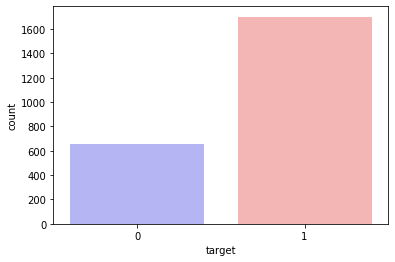

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.target == False])
countHaveDisease = len(df[df.target == True])
print("Percentage of values with False: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of values with True: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of values with False: 27.82%
Percentage of values with True: 72.18%


In [7]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [8]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x

,ABC,ABCGG,SpAbs_A,SpAD_A,LogEE_A,VE1_A,VE3_A,VR3_A,nAromAtom,nAromBond,nAtom,nHetero,nH,nC,nBonds,nBondsO,nBondsS,AMID_C,piPC3,piPC4
0,0.049763,0.071792,0.054600,0.054600,0.266432,0.300902,0.381166,0.114948,0.181818,0.176471,0.058376,0.057471,0.071429,0.077586,0.062189,0.053398,0.052198,0.630007,0.543095,0.733870
1,0.128207,0.177077,0.134278,0.134278,0.461844,0.539685,0.566784,0.207711,0.363636,0.352941,0.114213,0.080460,0.112245,0.181034,0.124378,0.135922,0.107143,0.770822,0.715243,0.856185
2,0.161097,0.223241,0.161298,0.161298,0.513128,0.586275,0.620502,0.236966,0.484848,0.500000,0.147208,0.103448,0.142857,0.224138,0.154229,0.165049,0.120879,0.747046,0.787017,0.906617
3,0.155844,0.214389,0.157189,0.157189,0.505149,0.565865,0.610887,0.238244,0.484848,0.500000,0.149746,0.091954,0.153061,0.224138,0.156716,0.160194,0.126374,0.766315,0.779058,0.902215
4,0.161097,0.223241,0.161298,0.161298,0.513128,0.586275,0.620502,0.236966,0.484848,0.500000,0.142132,0.114943,0.132653,0.215517,0.149254,0.165049,0.115385,0.720515,0.787017,0.906617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,0.010040,0.019669,0.009748,0.009748,0.075508,0.070773,0.194295,0.032664,0.000000,0.000000,0.015228,0.068966,0.020408,0.008621,0.014925,0.009709,0.016484,0.217610,0.156119,0.395893
2354,0.062642,0.091167,0.070846,0.070846,0.312518,0.275328,0.411990,0.169161,0.272727,0.294118,0.073604,0.080460,0.086735,0.086207,0.077114,0.067961,0.063187,0.585714,0.599384,0.791042
2355,0.063576,0.084874,0.066637,0.066637,0.309073,0.319634,0.410917,0.139228,0.393939,0.441176,0.068528,0.034483,0.081633,0.112069,0.074627,0.067961,0.046703,0.791176,0.674110,0.855317
2356,0.049023,0.067825,0.054161,0.054161,0.264910,0.236980,0.365424,0.149877,0.272727,0.294118,0.050761,0.068966,0.056122,0.068966,0.054726,0.053398,0.032967,0.573630,0.606910,0.800821


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=0, stratify = y)

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

In [10]:
x_train

,ABC,ABCGG,SpAbs_A,SpAD_A,LogEE_A,VE1_A,VE3_A,VR3_A,nAromAtom,nAromBond,nAtom,nHetero,nH,nC,nBonds,nBondsO,nBondsS,AMID_C,piPC3,piPC4
565,16.918192,14.245522,27.928465,27.928465,4.038860,4.086273,2.149571,5.754040,9,10,39,7,18,14,42,24,31,1.392646,4.657525,5.312898
1287,16.199514,13.913096,25.116863,25.116863,3.960101,3.628033,2.030628,6.645884,9,10,38,11,17,10,39,22,28,0.968861,4.525856,5.170129
957,33.575775,24.554909,55.043903,55.043903,4.689046,4.702592,3.006729,9.493666,27,28,79,9,36,34,83,47,52,1.627506,5.409971,6.040998
115,64.147985,41.585825,108.114791,108.114791,5.330493,6.274042,3.999744,17.813111,18,18,187,25,100,62,189,89,167,1.427934,5.261394,5.638799
1013,30.747348,23.331216,50.138953,50.138953,4.607023,4.685477,2.930762,8.987888,21,22,76,10,36,30,79,43,54,1.529096,5.287636,5.934067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,13.601438,12.376520,22.373339,22.373339,3.811467,3.840430,1.933371,5.129171,6,6,32,8,14,10,33,19,25,1.154315,4.347047,4.849096
2128,36.780152,29.362330,59.031616,59.031616,4.774631,4.570569,3.067200,9.167100,12,12,93,13,46,34,97,51,80,1.484431,5.105945,5.564520
1830,23.824871,22.718085,42.278071,42.278071,4.321617,4.383050,0.000000,7.622988,0,0,59,17,26,16,58,32,53,0.000000,4.158883,4.317488
89,23.610323,18.060685,38.905879,38.905879,4.333795,5.047199,2.717446,6.471283,17,17,50,11,20,19,53,33,35,1.309897,4.885639,5.421917


In [11]:
test_data = pd.read_csv("Impact_test_cfs_20.csv")
df1 = pd.DataFrame(test_data)
df1

,ABC,ABCGG,SpAbs_A,SpAD_A,LogEE_A,VE1_A,VE3_A,VR3_A,nAromAtom,nAromBond,nAtom,nHetero,nH,nC,nBonds,nBondsO,nBondsS,AMID_C,piPC3,piPC4
0,16.636714,15.898174,28.220086,28.220086,4.015845,4.055106,2.232886,5.918155,0,0,45,11,22,12,45,23,44,1.074014,3.806662,3.891820
1,12.239595,10.064792,21.583437,21.583437,3.707528,3.880956,1.943868,5.222413,0,0,48,2,30,16,47,17,45,1.737749,2.995732,2.995732
2,23.418813,18.234690,37.446155,37.446155,4.328777,3.880554,2.487380,11.453591,6,6,81,2,50,29,82,32,76,1.849514,4.491441,4.915408
3,23.681722,18.655564,38.023510,38.023510,4.349571,4.389904,2.577920,7.782731,0,0,80,1,50,29,83,33,82,1.976038,4.394449,4.718499
4,0.000000,0.000000,2.000000,2.000000,1.407606,1.414214,-1.262864,-1.262864,0,0,2,2,0,0,1,1,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,6.163363,6.515899,9.335326,9.335326,3.028326,2.774515,0.915116,3.075294,0,0,18,5,9,4,17,8,15,0.843518,2.484907,2.302585
22310,124.590661,82.585597,199.069744,199.069744,5.995605,8.888585,4.919135,11.623818,72,72,216,57,62,97,236,174,154,1.380650,6.788972,7.435586
22311,7.956514,7.521784,13.619695,13.619695,3.286693,3.095000,1.225098,3.759446,0,0,27,1,16,10,27,11,25,1.788984,3.178054,3.218876
22312,25.288404,20.109166,40.487667,40.487667,4.404876,4.795313,2.730790,6.789740,16,17,52,11,20,21,55,35,37,1.390723,5.131377,5.758507


In [12]:
# Normalize
df1 = (df1 - np.min(df1)) / (np.max(df1) - np.min(df1)).values
df1

,ABC,ABCGG,SpAbs_A,SpAD_A,LogEE_A,VE1_A,VE3_A,VR3_A,nAromAtom,nAromBond,nAtom,nHetero,nH,nC,nBonds,nBondsO,nBondsS,AMID_C,piPC3,piPC4
0,0.047078,0.061931,0.049081,0.049081,0.524031,0.194705,0.512324,0.205009,0.000000,0.000000,0.045267,0.057592,0.044088,0.037736,0.045732,0.047423,0.050926,0.496094,0.529306,0.503623
1,0.034635,0.039207,0.037539,0.037539,0.475406,0.183606,0.479677,0.185147,0.000000,0.000000,0.048354,0.010471,0.060120,0.050314,0.047764,0.035052,0.052083,0.802677,0.416548,0.387664
2,0.066270,0.071032,0.065128,0.065128,0.573384,0.183581,0.541072,0.363039,0.055556,0.055556,0.082305,0.010471,0.100200,0.091195,0.083333,0.065979,0.087963,0.854302,0.624522,0.636081
3,0.067014,0.072672,0.066132,0.066132,0.576664,0.216042,0.551299,0.258241,0.000000,0.000000,0.081276,0.005236,0.100200,0.091195,0.084350,0.068041,0.094907,0.912745,0.611036,0.610600
4,0.000000,0.000000,0.003478,0.003478,0.112679,0.026398,0.117446,0.000000,0.000000,0.000000,0.001029,0.010471,0.000000,0.000000,0.001016,0.002062,0.001157,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,0.017441,0.025382,0.016236,0.016236,0.368287,0.113092,0.363470,0.123849,0.000000,0.000000,0.017490,0.026178,0.018036,0.012579,0.017276,0.016495,0.017361,0.389626,0.345519,0.297967
22310,0.352563,0.321709,0.346228,0.346228,0.836264,0.502748,0.815761,0.367899,0.666667,0.666667,0.221193,0.298429,0.124248,0.305031,0.239837,0.358763,0.178241,0.637731,0.943987,0.962206
22311,0.022515,0.029301,0.023688,0.023688,0.409035,0.133517,0.398485,0.143381,0.000000,0.000000,0.026749,0.005236,0.032064,0.031447,0.027439,0.022680,0.028935,0.826343,0.441899,0.416540
22312,0.071560,0.078334,0.070417,0.070417,0.585386,0.241879,0.568567,0.229892,0.148148,0.157407,0.052469,0.057592,0.040080,0.066038,0.055894,0.072165,0.042824,0.642384,0.713503,0.745183


In [13]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
#x_val = x_val.T
#y_val = y_val.T

In [45]:
#hyper parameter tuning
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [2,4]
# Minimum number of samples required to split a node
#min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

In [46]:
#param_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}
#print(param_grid)

In [16]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=14, max_features=5, min_samples_leaf=1, min_samples_split=2, criterion='gini')
rf.fit(x_train.T, y_train.T)
predictions = rf.predict(x_test.T)
acc = rf.score(x_test.T,y_test.T)*100
predictions_tr = rf.predict(x_train.T)
predictions_test = rf.predict(test_data)
#predictions_val = rf.predict(x_val.T)
acc = rf.score(x_test.T,y_test.T)*100
acc_tr =rf.score(x_train.T,y_train.T)*100
#acc_val =rf.score(x_val.T,y_val.T)*100
print(acc)
print(acc_tr)
print(predictions_test)
predictions_test = pd.DataFrame(predictions_test)
predictions_test.to_csv('RF_Impact_Naga.csv')

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

80.50847457627118
96.60657476139978
[1 1 0 ... 0 1 0]


In [17]:
probability =rf.predict_proba(test_data)
probability= pd.DataFrame(probability)
probability.to_csv("Rf_Impact_Probability.csv")

C:\Users\NEIST\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [65]:
#from sklearn.model_selection import GridSearchCV
#rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [66]:
#rf_Grid.fit(x_train.T, y_train.T)

In [67]:
#rf_Grid.best_params_

In [68]:
#print (f'Train Accuracy - : {rf_Grid.score(x_train.T,y_train.T):.3f}')
#print (f'Test Accuracy - : {rf_Grid.score(x_test.T,y_test.T):.3f}')

In [69]:
#with open('corr_rf_model.pickel', 'wb') as f:
#    pickle.dump(rf, f)

In [70]:
#from sklearn.metrics import matthews_corrcoef
#matthews_corrcoef(y_val, predictions_val)

In [71]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rf, X=x_train.T, y=y_train.T, cv=10)
print(accuracies)
print(accuracies.mean())

[0.85185185 0.86243386 0.84126984 0.86243386 0.85185185 0.84126984
 0.85638298 0.84042553 0.85106383 0.85638298]
0.8515366430260048


In [72]:
cf =(confusion_matrix(y_test, predictions))
#cf_val =(confusion_matrix(y_val, predictions_val))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
#print(confusion_matrix(y_train, predictions_tr))
#print(classification_report(y_train, predictions_tr))
#print(confusion_matrix(y_val, predictions_val))
#print(classification_report(y_val, predictions_val))

[[ 97  34]
 [ 29 312]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       131
           1       0.90      0.91      0.91       341

    accuracy                           0.87       472
   macro avg       0.84      0.83      0.83       472
weighted avg       0.87      0.87      0.87       472



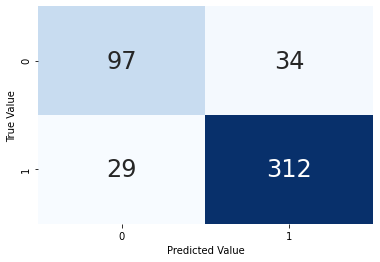

In [74]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [25]:
#cf_plt =sns.heatmap(cf_val,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
#cf_plt

In [26]:
#parameters
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, predictions)
print('MCC = %0.3f'% mcc)
r_auc_score = roc_auc_score(y_test, predictions)
print('AUC = %0.3f' % r_auc_score)
rsquare = r2_score(y_test, predictions)
print('R2 = %0.3f' % rsquare)
#mae = mean_absolute_error(y_test, predictions)
#print('MAE = %0.3f)' % mae)
mse = mean_squared_error(y_test, predictions)
print('MSE = %0.3f' % mse)
mbe = np.mean(predictions - y_test)
print('MBE = %0.3f'% mbe)
rmse = mse** (1/2)
print('RMSE = %0.3f' % rmse)
variance = np.var(predictions)
print('Variance = %0.3f'% variance)
sse = np.mean((np.mean(predictions) - y)** 2)
bias = sse - variance
print('Bias = %0.3f'% bias)
kappa = cohen_kappa_score(y_test, predictions)
print('Kappa = %0.3f'% kappa)

MCC = 0.717
AUC = 0.854
R2 = 0.440
MSE = 0.112
MBE = 0.011
RMSE = 0.335
Variance = 0.196
Bias = 0.005
Kappa = 0.717


In [27]:
#fall out
FP = cf.sum(axis=0) - np.diag(cf) 
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
#TPR = TP/(TP+FN)
# Specificity or true negative rate
#TNR = TN/(TN+FP) 
# Precision or positive predictive value
#PPV = TP/(TP+FP)
# Negative predictive value
#NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
#ACC = (TP+TN)/(TP+FP+FN+TN)
print(FPR)
print(FNR)
print(FDR)

[0.07038123 0.22137405]
[0.22137405 0.07038123]
[0.19047619 0.08381503]


In [28]:
#r_probs = [0 for _ in range(len(y_test))]
#rf_prob = rf.predict_proba(x_test.T)
#rf_prob = rf_prob[:,1]
#rf_prob

In [29]:
#r_auc_score = roc_auc_score(y_test, rf_prob)
#r_auc_score_1 = roc_auc_score(y_test,r_probs)
#print(r_auc_score)
#fpr, tpr, _ = roc_curve(y_test, rf_prob)
#rfpr, rtpr, _ = roc_curve(y_test, r_probs)

In [30]:
#plt.figure(figsize=(5, 5), dpi=100)
#plt.plot(fpr, tpr, marker='.', label='Random Forest (auc = %0.3f)' % r_auc_score)
#plt.plot(rfpr, rtpr, marker='_' % r_auc_score_1)
#plt.title('Mutual information based feature selection')
#plt.xlabel('False Positive Rate -->')
#plt.ylabel('True Positive Rate -->')#

#plt.legend()

#plt.show()

## Y scrambling

In [38]:
data = pd.read_csv("C:/Users/NEIST/Desktop/Pre/main_datasets/MI_dataset_40.csv")
df2 = pd.DataFrame(data)
df2

,BCUTv-1l,BCUTi-1h,BCUTp-1l,BCUTZ-1l,BCUTd-1h,BCUTare-1l,BCUTs-1l,BCUTse-1l,BCUTpe-1l,PEOE_VSA9,...,EState_VSA1,BCUTi-1l,EState_VSA2,SlogP_VSA2,EState_VSA1.1,BCUTpe-1h,BCUTare-1h,SM1_Dzpe.1,VE3_Dt,target
0,14.701776,14.557741,0.744080,5.748825,3.218349,2.238180,1.240005,2.479451,2.284833,12.710848,...,5.689743,11.016030,24.498016,27.368454,5.689743,3.497552,3.550658,0.115887,1.848082,1
1,14.700550,13.644287,0.741446,5.679853,3.258335,2.178923,1.143745,2.424758,2.228722,39.958147,...,12.021872,10.940313,31.204942,45.805050,12.021872,3.502119,3.556051,0.150331,2.794152,1
2,13.304117,17.424774,0.545839,5.666628,3.296716,2.162280,1.195097,2.406729,2.211106,30.297854,...,28.820609,10.929834,40.825098,46.918075,28.820609,3.988694,4.107737,0.167602,3.106261,1
3,13.304118,17.424774,0.545842,5.666628,3.296579,2.162280,1.195097,2.406729,2.211106,30.297854,...,28.820609,10.929834,29.354467,47.555652,28.820609,3.988691,4.107734,0.155095,3.065226,1
4,13.304116,17.424774,0.545837,5.666628,3.296716,2.162280,1.195097,2.406729,2.211106,36.842611,...,34.913849,10.929834,41.524801,53.711018,34.913849,3.988697,4.107738,0.180109,3.106261,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,13.304122,17.424767,0.546071,5.883844,4.032418,1.994006,0.291268,2.424025,2.114058,0.000000,...,19.477831,10.452581,0.000000,26.775420,19.477831,3.988542,4.107622,0.122233,0.978638,0
2354,14.705903,14.565372,0.775868,5.762599,3.267801,2.247387,1.220651,2.485813,2.292618,13.437118,...,0.000000,11.039490,25.080009,50.055651,0.000000,3.466011,3.523101,0.126756,2.108063,0
2355,15.584269,14.558553,0.996165,5.671568,3.309310,2.167403,1.257100,2.411225,2.216060,17.360722,...,0.000000,10.936672,0.000000,14.535057,0.000000,3.180805,3.194517,0.081444,2.031198,1
2356,14.702534,14.565388,0.748758,5.756853,3.269475,2.240717,1.419059,2.478957,2.285506,12.934202,...,5.559267,11.018869,18.071922,31.232445,5.559267,3.491690,3.545779,0.114249,1.851046,0


In [39]:
#accuracy_list = []
#dataset
y = df2.target.values
x_data = df2.drop(['target'], axis = 1)
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1, stratify = y)
y_train

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [40]:
y_test = pd.DataFrame(y_test)
y_test

,0
0,1
1,1
2,0
3,1
4,1
...,...
467,0
468,1
469,0
470,1


In [41]:
y_train = pd.DataFrame(y_train)
y_train

,0
0,1
1,1
2,1
3,0
4,0
...,...
1881,1
1882,0
1883,0
1884,1


In [43]:
from sklearn.ensemble import RandomForestClassifier
accuracy_list = []
for i in range(150):
    y_train = y_train.sample(frac=1, replace=False, random_state=i)
    rf1 = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=14, max_features=5, min_samples_leaf=1, min_samples_split=2, criterion='gini')
    #xgb_model1 = xgb.XGBClassifier(objective="binary:logistic",
    #                              random_state=2,
    #                              min_child_weight= 1, 
    #                              max_depth= 11,
    #                              learning_rate= 0.03,
    #                             n_estimators=45,
    #                              colsample_bytree= 0.7)
    rf1.fit(x_train, y_train)
    scrmb_predictions = rf1.predict(x_test)
    print(i)
    accuracy = roc_auc_score(y_test, scrmb_predictions)
    accuracy_list.append(accuracy)
print
accuracy_list

<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


0


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


1


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


2


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


3


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


4


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


5


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


6


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


7


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


8


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


9


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


10


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


11


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


12


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


13


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


14


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


15


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


16


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


17


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


18


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


19


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


20


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


21


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


22


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


23


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


24


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


25


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


26


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


27


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


28


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


29


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


30


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


31


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


32


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


33


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


34


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


35


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


36


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


37


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


38


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


39


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


40


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


41


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


42


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


43


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


44


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


45


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


46


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


47


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


48


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


49


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


50


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


51


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


52


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


53


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


54


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


55


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


56


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


57


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


58


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


59


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


60


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


61


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


62


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


63


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


64


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


65


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


66


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


67


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


68


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


69


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


70


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


71


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


72


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


73


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


74


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


75


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


76


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


77


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


78


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


79


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


80


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


81


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


82


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


83


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


84


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


85


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


86


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


87


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


88


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


89


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


90


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


91


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


92


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


93


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


94


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


95


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


96


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


97


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


98


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


99


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


100


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


101


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


102


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


103


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


104


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


105


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


106


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


107


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


108


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


109


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


110


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


111


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


112


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


113


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


114


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


115


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


116


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


117


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


118


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


119


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


120


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


121


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


122


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


123


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


124


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


125


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


126


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


127


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


128


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


129


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


130


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


131


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


132


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


133


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


134


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


135


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


136


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


137


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


138


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


139


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


140


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


141


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


142


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


143


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


144


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


145


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


146


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


147


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


148


<ipython-input-43-cf5d33682069>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train, y_train)


149


[0.4912471178169282,
 0.5147299142620492,
 0.48068097871102056,
 0.49888070560318776,
 0.506212083902308,
 0.4921313603904099,
 0.5238297777081328,
 0.48037876922388123,
 0.49271339347675225,
 0.49681001096908506,
 0.5132636386022251,
 0.5000447717758725,
 0.5197107743278637,
 0.5009290143493542,
 0.5064919075015111,
 0.5370486445344854,
 0.4947840881108549,
 0.5238073918201966,
 0.4812853976852992,
 0.48300911105639005,
 0.49976494817666944,
 0.5141254952877706,
 0.47716639430503016,
 0.47716639430503016,
 0.48477759620335337,
 0.48566183877683505,
 0.48684829083745607,
 0.49799646302970607,
 0.5481968167267355,
 0.5203151933021423,
 0.5220612925611694,
 0.49799646302970607,
 0.4944818786237156,
 0.5308589465201137,
 0.49564594479640034,
 0.5135434622014282,
 0.5235275682209934,
 0.5291128472610866,
 0.5067941169886503,
 0.45896666741286296,
 0.4859640482639744,
 0.5135658480893645,
 0.49387745964943697,
 0.5062344697902442,
 0.49036287524344657,
 0.4812630117973629,
 0.51265921962794

[(0.0, 1.0)]

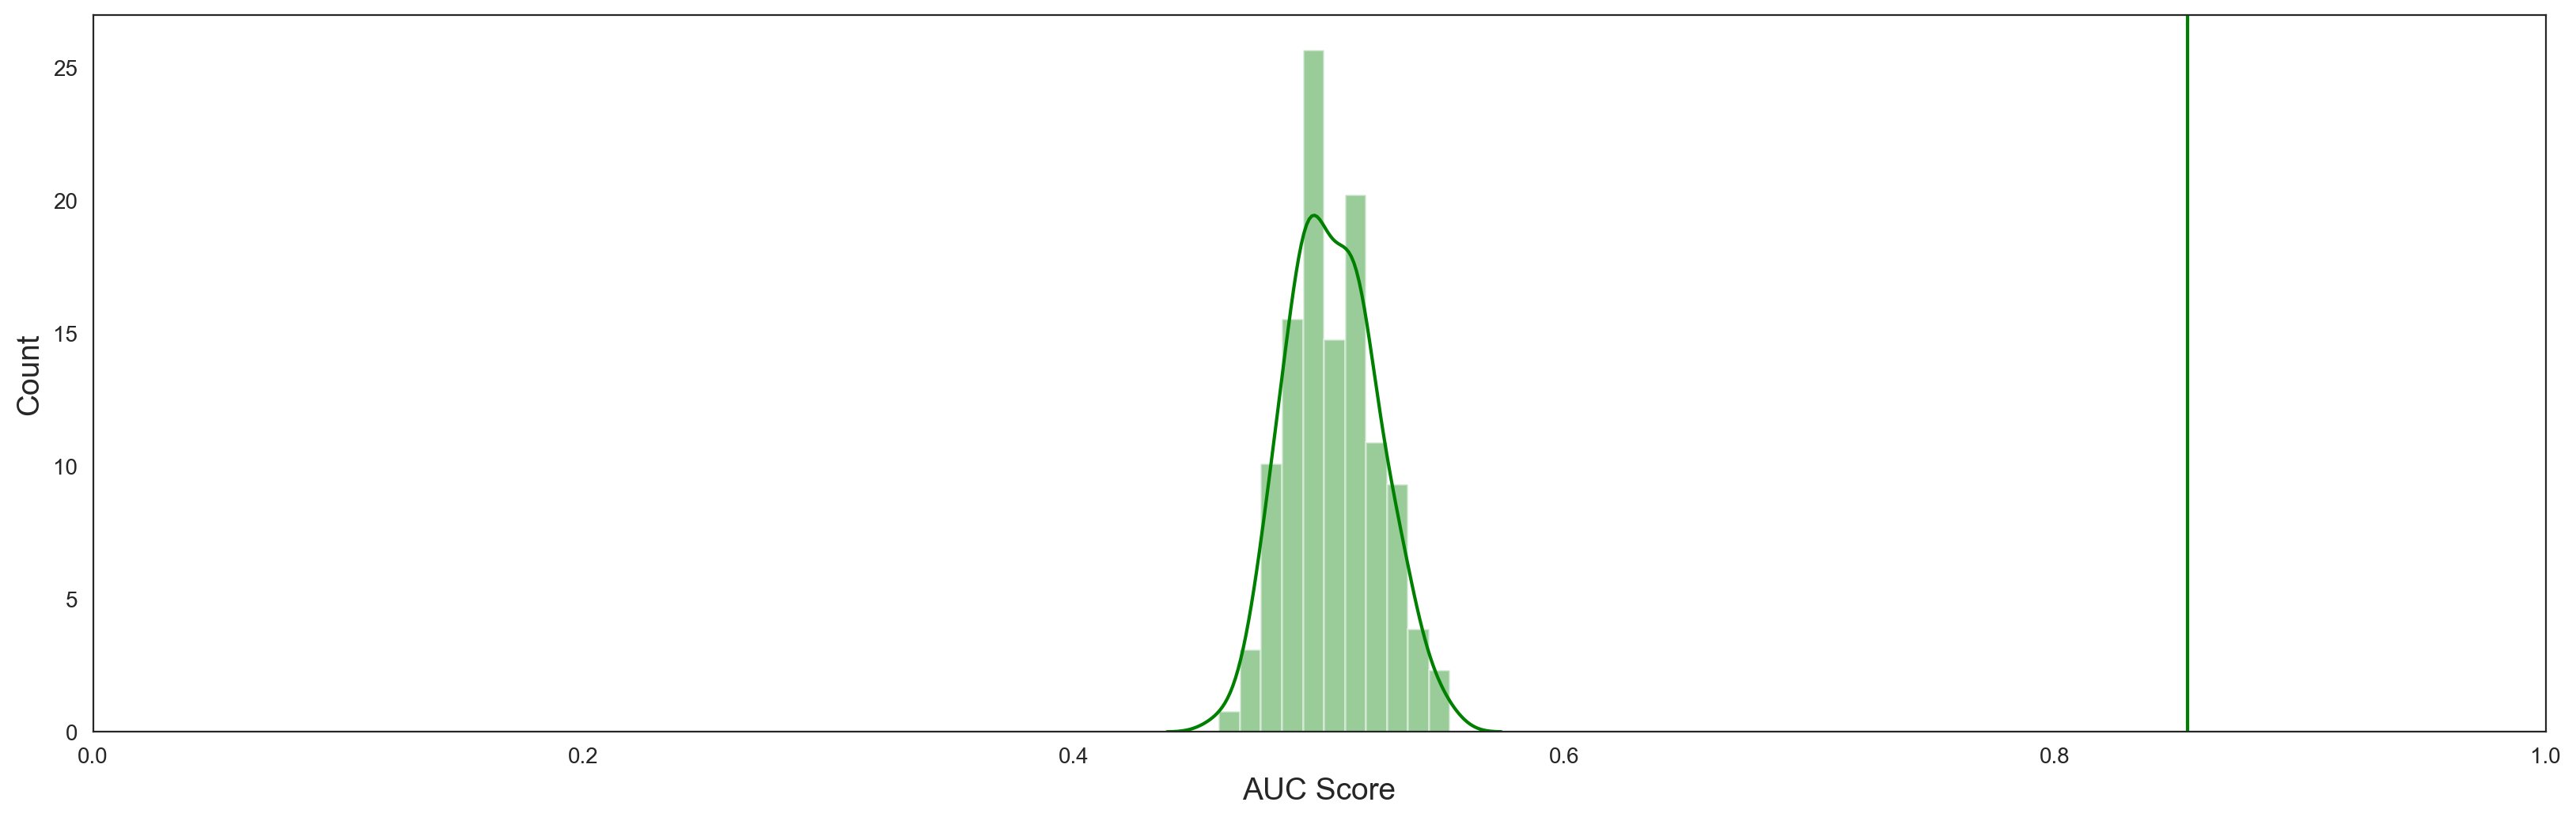

In [45]:
sns.set_style("white")
plt.figure(figsize = (20, 6), dpi=200) 
ax = sns.distplot(accuracy_list, color="green")
plt.axvline(r_auc_score, color="green")
plt.xlabel("AUC Score", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
ax.set(xlim=(0, 1))

In [37]:
print("complete")

complete
